In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image

In [2]:
##################  Parameter ###############
K = 5
FILESRC = 'D:\Program Annex\jpDigitalRecognit\\\\'

In [3]:
################## matrix file to vector ###########
def mat2vect(file_path):
    v = np.zeros((1, 1024))
    fp = open(file_path)
    # 32 * 32 matrix
    for i in range(32):
        line = fp.readline()
        for j in range(32):
            v[0, 32 * i + j] = int(line[j])

    return v

In [4]:
##################       knn       #################
## The most critical function
def knn(test_vector, train_matrix, train_labels, k):
    train_size = train_matrix.shape[0]
    test_diff_mat = np.tile(test_vector, (train_size, 1)) - train_matrix # test vector-> martix   ,  make diff 
    test_diff_mat_sq = test_diff_mat ** 2
    test_mat_sum = test_diff_mat_sq.sum(axis = 1)
    test_distance = test_mat_sum ** 0.5 # compute distance
    distance_sorted_index = test_distance.argsort() # return the index of sorted 
    
    # get count
    class_count = {}
    for i in range(k):
        t_label = train_labels[distance_sorted_index[i]]
        class_count[t_label] = class_count.get(t_label, 0) + 1 # label add one
    class_count_sort = sorted(class_count.items(), key = operator.itemgetter(1), reverse=True) # descending order 
        
    return class_count_sort[0][0]

In [5]:
##################  Read data ###############
def readData(src):
    train_src = src + 'trainDigits\\\\'
    test_src = src +'testDigits\\\\'
    train_labels = []
    test_labels = []
    
    # get  the name of all file
    train_file_list = listdir(train_src)
    test_file_list = listdir(test_src)
    
    # get the number of file
    train_num = len(train_file_list)
    test_num = len(test_file_list)
    
    # get the matrix of  all file
    train_matrix = np.zeros((train_num, 1024))
    test_matrix = np.zeros((test_num, 1024))
    
    # get all train file matrix
    for i in range(train_num):
        file_name = train_file_list[i] # get file name
        file_label = int(file_name.split('_')[0]) # get file label
        train_labels.append(file_label) # keep label
        file_path = train_src + file_name
        train_matrix[i , :] = mat2vect(file_path) # compute data
    
    # the same as train data
    for i in range(test_num):
        file_name = test_file_list[i] # get file name
        file_label = int(file_name.split('_')[0]) # get file label
        test_labels.append(file_label) # keep label
        file_path = test_src + file_name
        test_matrix[i , :] = mat2vect(file_path) # compute data
    
    
    return train_matrix, train_labels, test_matrix, test_labels

In [6]:
###################  main  #####################
## variable
all_num = 0
error_num = 0
corrcet_num = 0
corrcet_percent = 0

## compute
train_matrix,  train_label, test_matrix, test_label = readData(FILESRC)
for i in range(test_matrix.shape[0]):
    test_vec = test_matrix[i]
    test_lab = test_label[i]
    test_res = knn(test_vec, train_matrix, train_label, K)
#     print("knn result: %d  ,  real: %d " % (test_res, test_lab))
    if test_lab != test_res:
        error_num = error_num + 1

## output
all_num = test_matrix.shape[0]
corrcet_num = all_num - error_num
corrcet_percent = (corrcet_num / all_num) * 100
print("Test number :  %d  " %(all_num))        
print("Error number :  %d " %(error_num))
print("Correct number : %d" %(corrcet_num))
print("Correct percent : %.2f%%" %(corrcet_percent))

Test number :  946  
Error number :  17 
Correct number : 929
Correct percent : 98.20%


The K :  1
Test number :  946  
Error number :  13 
Correct number : 933
Correct percent : 98.63%
---------------------------------------------------------
The K :  11
Test number :  946  
Error number :  32 
Correct number : 914
Correct percent : 96.62%
---------------------------------------------------------
The K :  21
Test number :  946  
Error number :  61 
Correct number : 885
Correct percent : 93.55%
---------------------------------------------------------
The K :  31
Test number :  946  
Error number :  96 
Correct number : 850
Correct percent : 89.85%
---------------------------------------------------------
The K :  41
Test number :  946  
Error number :  141 
Correct number : 805
Correct percent : 85.10%
---------------------------------------------------------
The K :  51
Test number :  946  
Error number :  190 
Correct number : 756
Correct percent : 79.92%
---------------------------------------------------------
The K :  61
Test number :  946  
Error number :  242 
Cor

Text(0, 0.5, 'knn CP')

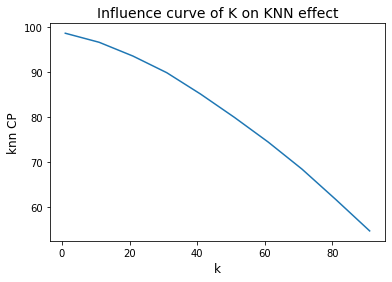

In [7]:
###################  main_all  #####################
## variable
all_num = 0
error_num = 0
corrcet_num = 0
corrcet_percent = 0
x_var = list(range(1, 99, 10))
y_var = list()


## compute
train_matrix,  train_label, test_matrix, test_label = readData(FILESRC)

for k in x_var:
    for i in range(test_matrix.shape[0]):
        test_vec = test_matrix[i]
        test_lab = test_label[i]
        test_res = knn(test_vec, train_matrix, train_label, k)
    #     print("knn result: %d  ,  real: %d " % (test_res, test_lab))
        if test_lab != test_res:
            error_num = error_num + 1

    ## output
    all_num = test_matrix.shape[0]
    corrcet_num = all_num - error_num
    corrcet_percent = (corrcet_num / all_num) * 100
    print("The K :  %d" %(k))
    print("Test number :  %d  " %(all_num))        
    print("Error number :  %d " %(error_num))
    print("Correct number : %d" %(corrcet_num))
    print("Correct percent : %.2f%%" %(corrcet_percent))
    y_var.append(corrcet_percent)
    print("---------------------------------------------------------")

plt.plot(x_var, y_var)
plt.title("Influence curve of K on KNN effect", fontsize=14)
plt.xlabel("k", fontsize=12)
plt.ylabel("knn CP", fontsize=12)

-----------------------------  New Test  --------------------------------

In [8]:
################ img2grey  ###############
def img2grey(file_path, grey_size):
    orig_img = Image.open(file_path) # open file
    orig_img = orig_img.resize((grey_size, grey_size)) # compress
    grey_img = orig_img.convert('L') # convert grey
    grey_img_src = file_path.split('.')[-2] + '_grey.jpg' # get grey img name
    grey_img.save(grey_img_src) # save grey img
    
    return grey_img_src

In [9]:
############### grey2bin  ################
def grey2bin(file_path, pix_divd):
    grey_img = Image.open(file_path)
    bin_src = file_path.split('.')[-2] + '_bin.txt'
    fp_bin = open(bin_src, 'w')
    
    for i in range(grey_img.size[1]):
        for j in range(grey_img.size[0]):
            pix_point = grey_img.getpixel((j, i))
            if pix_point > pix_divd:
                pix_point = 0
            else:
                pix_point = 1
            
            fp_bin.write(str(pix_point)) # write in txt
        fp_bin.write('\n')

    fp_bin.close()
    
    return bin_src

In [10]:
###########################################
################ new test  main###############
## variable
flod_path = "D:\Program Annex\jpDigitalRecognit\\newTest\\\\"
test_path = flod_path + 'test4.jpg'
k = 5
img_size = 32
grey_divid = 200

## convert
grey_path = img2grey(test_path, img_size)
bin_path = grey2bin(grey_path, grey_divid)

## read
test_vect = mat2vect(bin_path)

## knn
test_res = knn(test_vect, train_matrix, train_label, k)
print("The test number is  :  %d " %(test_res))

The test number is  :  2 
